In [1]:
## Use case : Predict success of a restaurant on Zomato

## Life Cycle
## 1. Raw data from CSV file
## 2. Data cleaning and preprocessing
## 3. Data analysis
## 4. Feature engineering amd feature selection
## 5. Apply ML algorithm

In [2]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Read the data
df = pd.read_csv("zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
print(df.shape)
print(df.columns)

(51717, 17)
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [5]:
# Getting the names of columns/features having NaN values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
# Get a list of only those features (column names) having NaN/null values
print("Following features have null/NaN values")
[feature for feature in df.columns if df[feature].isna().sum() > 0]

Following features have null/NaN values


['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
# What percentage of missing values ?
na_features = [feature for feature in df.columns if df[feature].isna().sum() > 0]

# Method 1
for na_feature in na_features:
    print(na_feature)
    print((df[na_feature].isna().value_counts(normalize=True))*100," % missing values")
    print("---------------------------------------------------------------------")


# Method 2
for na_feature in na_features:
    print(na_feature," --> ",np.round((df[na_feature].isna().sum()/len(df[na_feature]))*100,3)," % missing values")

rate
False    84.966259
True     15.033741
Name: rate, dtype: float64  % missing values
---------------------------------------------------------------------
phone
False    97.664211
True      2.335789
Name: phone, dtype: float64  % missing values
---------------------------------------------------------------------
location
False    99.959394
True      0.040606
Name: location, dtype: float64  % missing values
---------------------------------------------------------------------
rest_type
False    99.561073
True      0.438927
Name: rest_type, dtype: float64  % missing values
---------------------------------------------------------------------
dish_liked
True     54.291626
False    45.708374
Name: dish_liked, dtype: float64  % missing values
---------------------------------------------------------------------
cuisines
False    99.912988
True      0.087012
Name: cuisines, dtype: float64  % missing values
---------------------------------------------------------------------
approx_cost(

In [8]:
# Data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
## Data cleaning on "approx_cost(for two people)"

In [10]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [11]:
# Where are the null values in this feature ?
df.loc[df['approx_cost(for two people)'].isna(),'approx_cost(for two people)']

1662     NaN
1768     NaN
1795     NaN
3069     NaN
3774     NaN
        ... 
50940    NaN
51233    NaN
51247    NaN
51271    NaN
51641    NaN
Name: approx_cost(for two people), Length: 346, dtype: object

In [12]:
# Look at unique values of "approx_cost(for two people)" column
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [13]:
## Due to comma(,) in some values, it is considered as object (str) datatype rather than int

In [14]:
# Replace comma(,) with blank string ''
temp_df = df['approx_cost(for two people)'].str.replace(',','')
temp_df.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [15]:
# Update as float values in original data
df['approx_cost(for two people)'] = temp_df.apply(lambda x: float(x))
df['approx_cost(for two people)'].dtype

dtype('float64')

In [16]:
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [17]:
## Now perform data cleaning on "rate" feature(column)

In [18]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [19]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
rate_modified = df['rate'].str.replace('/5','')
rate_modified = rate_modified.str.replace(' ','')
rate_modified = rate_modified.replace('NEW',0)
rate_modified = rate_modified.replace('-',0)
rate_modified.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [21]:
df['rate'] = rate_modified.apply(lambda x: float(x))

In [22]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [23]:
## How many types of restaurants do we have ?
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

<AxesSubplot:>

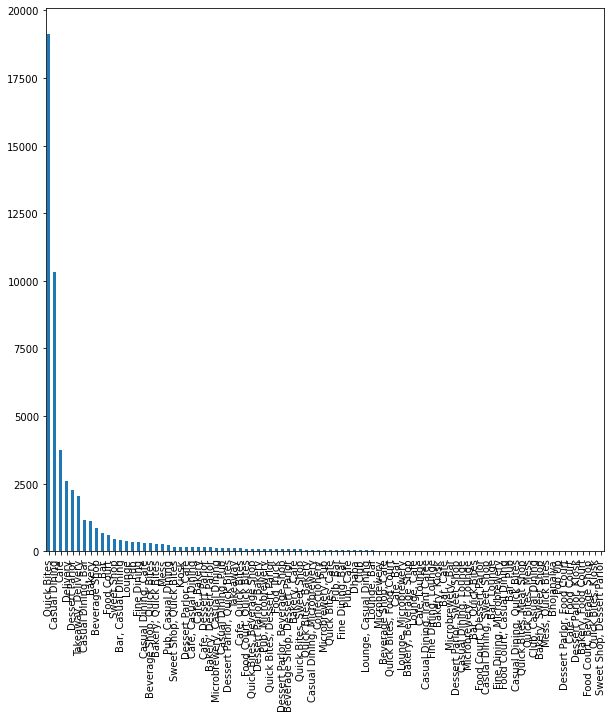

In [24]:
plt.figure(figsize=(10,10))
df['rest_type'].value_counts().plot.bar()

<AxesSubplot:>

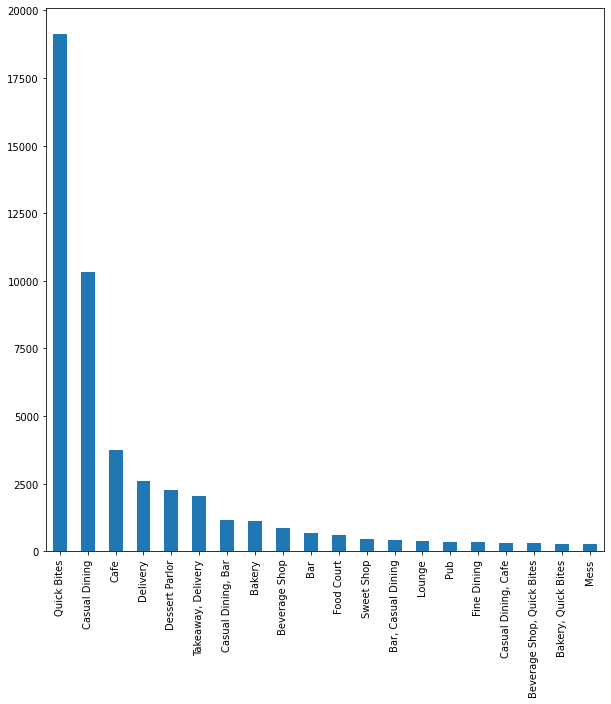

In [25]:
# Get 20 major restaurant types
plt.figure(figsize=(10,10))
df['rest_type'].value_counts().nlargest(20).plot.bar()

In [26]:
## From above plot, we can infer that majority of restaurants are "Quick Bites" and "Casual Dining"

In [27]:
# Add new feature as majority_types and classify as follows
# "Quick Bites","Casual Dining" ==> "Quick Bites + Casual Dining"
# Others ==> "Others"

def major_rest_type(rest_type):
    if rest_type in ["Quick Bites","Casual Dining"]:
        return ("Quick Bites + Casual Dining")
    else:
        return ("Others")
    
df['majority_type'] = df['rest_type'].apply(major_rest_type)

In [28]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [29]:
df['majority_type'].value_counts()

Quick Bites + Casual Dining    29462
Others                         22255
Name: majority_type, dtype: int64

In [30]:
df['majority_type'].value_counts(normalize=True)

Quick Bites + Casual Dining    0.569677
Others                         0.430323
Name: majority_type, dtype: float64

In [31]:
## Now in the dataset, we have multiple entries for same restaurant name (multiple branches of a restaurant).
## We need to group the data of same named restaurant and derive some useful insights and get some statistics

In [32]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'majority_type'],
      dtype='object')

In [33]:
# We fetch total votes, total unities (branches/outlets), average cost for two people, average rating, etc
# Apply aggregate function : agg()
df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'})

,votes,url,approx_cost(for two people),rate
name,,,,
#FeelTheROLL,14,2,200.0,3.400000
#L-81 Cafe,432,9,400.0,3.900000
#Vibes Restro,0,3,700.0,NaN
#refuel,111,3,400.0,3.700000
'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...
late100,0,5,200.0,NaN
nu.tree,1443,8,400.0,4.314286
re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000


In [34]:
rest_df = df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest_df.head()

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [35]:
# Rename the columns
rest_df.columns = ['name','total_votes','total_unities(outlets)','avg_approx_cost','avg_rating']
rest_df.head()

,name,total_votes,total_unities(outlets),avg_approx_cost,avg_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [36]:
# Adding extra feature "votes_per_unity"
rest_df['votes_per_unity'] = (rest_df['total_votes']/rest_df['total_unities(outlets)'])
rest_df.head()

,name,total_votes,total_unities(outlets),avg_approx_cost,avg_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [37]:
# Sort data according to total_unities(outlets)
popular_rest_df = rest_df.sort_values(by='total_unities(outlets)',ascending=False)
popular_rest_df

,name,total_votes,total_unities(outlets),avg_approx_cost,avg_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [38]:
# Top 5 most expensive restaurants
popular_rest_df.sort_values(by='avg_approx_cost',ascending=False).head()

,name,total_votes,total_unities(outlets),avg_approx_cost,avg_rating,votes_per_unity
4372,Le Cirque Signature - The Leela Palace,254,2,6000.0,4.3,127.0
6263,Royal Afghan - ITC Windsor,413,1,5000.0,4.3,413.0
4628,Malties - Radisson Blu,106,2,4500.0,4.3,53.0
4276,La Brasserie - Le Meridien,1236,4,4100.0,4.1,309.0
2358,Dum Pukht Jolly Nabobs - ITC Windsor,291,1,4000.0,4.3,291.0


In [39]:
# 5 least expensive (5 cheapest) restaurants
popular_rest_df.sort_values(by='avg_approx_cost').head()

,name,total_votes,total_unities(outlets),avg_approx_cost,avg_rating,votes_per_unity
7276,Srinidhi Sagar Deluxe,216,2,40.0,3.6,108.0
1181,Bread & Better,0,2,50.0,NaN,0.0
2775,Funky Food,0,1,60.0,NaN,0.0
5101,Namaste,0,2,70.0,0.0,0.0
5210,Nellore Dosa Camp,5,1,70.0,3.3,5.0


In [40]:
# Get the number and percentage of restaurants which provide table booking service
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [41]:
df['book_table'].value_counts(normalize=True)

No     0.875302
Yes    0.124698
Name: book_table, dtype: float64

In [42]:
# Get the number and percentage of restaurants which provide online order service
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [43]:
df['online_order'].value_counts(normalize=True)

Yes    0.588665
No     0.411335
Name: online_order, dtype: float64

In [44]:
## Get budget friendly and good restaurants in a given location and a given type of restaurant

In [45]:
# Get the max affordable cost from user
budget = float(input("Enter the budget : "))

# Get location
location = input("Enter the location : ")

# Get the type of restaurant
rest_type = input("Enter the type of restaurant : ")

# Get the acceptable rating of the restaurant
rating = float(input("Enter your acceptable rating of the restaurant : "))

filt = (df['approx_cost(for two people)']<=budget) & (df['location']==location) & (df['rest_type']==rest_type) & (df['rate']>=rating)
df[filt]['name'].unique()

Enter the budget : 700
Enter the location : BTM
Enter the type of restaurant : Quick Bites
Enter your acceptable rating of the restaurant : 4


array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Midnight Mania', 'Litti Twist', 'The Shawarma Shop',
       'Gorbandh', 'Yum In My Tum', 'Nanna Munna Paratha House',
       'Chaatimes', 'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand',
       'Petoo', 'Ilyazsab The House Of Chicken', 'Hungry Lee',
       'Kannur Food Point', "Domino's Pizza",
       'Kesar Sweet Shop and Fast Food', 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia', 'Mojo Pizza - 2X Toppings',
       'Royal Biryani Kitchen'], dtype=object)

In [46]:
## Extract latitudes and longitudes of locations using GeoPy to perform geographical analysis.
## For example, what area (latitudes and longitudes) has popular or highest rated restaurants.

In [47]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='app')

In [48]:
location = df.loc[12,'location']
location

'Banashankari'

In [49]:
intersection = geolocator.geocode(location)
print("Latitude  (",location,") ==> ",intersection.latitude)
print("Longitude (",location,") ==> ",intersection.longitude)

Latitude  ( Banashankari ) ==>  15.8876779
Longitude ( Banashankari ) ==>  75.7046777


In [50]:
location = df.loc[1000,'location']
intersection = geolocator.geocode(location)
print("Latitude  (",location,") ==> ",intersection.latitude)
print("Longitude (",location,") ==> ",intersection.longitude)

Latitude  ( JP Nagar ) ==>  12.2655944
Longitude ( JP Nagar ) ==>  76.6465404


In [51]:
# Now we create latitude and longitude column for all locations
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [52]:
# We will create a dataframe for above generated output
locations = pd.DataFrame({'location_name':df['location'].unique()})
locations

,location_name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [53]:
for index,value in locations['location_name'].items():
    if type(value) != type(np.nan):
        intersection = geolocator.geocode(value)
        if intersection != None:
            locations.at[index,'latitude'] = intersection.latitude
            locations.at[index,'longitude'] = intersection.longitude
    
locations

,location_name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318
...,...,...,...
89,West Bangalore,13.001129,77.632562
90,Magadi Road,12.945048,77.263004
91,Yelahanka,13.100698,77.596345
92,Sahakara Nagar,13.062147,77.580061


In [54]:
# Now we will perform geographical analysis (spatial analysis) using latitudes and longitudes of the data
# We will figure out where exactly most of the restaurants are situated

In [55]:
# Get the count of restaurants in each location
count_per_location_df = df['location'].value_counts().reset_index()
count_per_location_df.columns = ['location_name','count']
count_per_location_df

,location_name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,Yelahanka,6
89,West Bangalore,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [56]:
# Merge two dataframes using 'location_name'
rest_locations_count = locations.merge(count_per_location_df,on='location_name').dropna()
rest_locations_count

,location_name,latitude,longitude,count
0,Banashankari,15.887678,75.704678,906
1,Basavanagudi,12.941726,77.575502,684
2,Mysore Road,12.387214,76.666963,22
3,Jayanagar,27.643927,83.052805,1926
4,Kumaraswamy Layout,12.908149,77.555318,195
...,...,...,...,...
88,West Bangalore,13.001129,77.632562,6
89,Magadi Road,12.945048,77.263004,34
90,Yelahanka,13.100698,77.596345,6
91,Sahakara Nagar,13.062147,77.580061,53


In [57]:
rest_locations_count = rest_locations_count.sort_values(by='count',ascending=False)
rest_locations_count

,location_name,latitude,longitude,count
13,BTM,45.954851,-112.496595,5124
18,HSR,18.147500,41.538889,2523
23,Koramangala 5th Block,13.005409,74.794607,2504
8,JP Nagar,12.265594,76.646540,2235
30,Whitefield,44.373058,-71.611858,2144
...,...,...,...,...
88,West Bangalore,13.001129,77.632562,6
90,Yelahanka,13.100698,77.596345,6
78,Jakkur,13.078474,77.606894,3
5,Rajarajeshwari Nagar,12.927441,77.515522,2


In [58]:
## Plot heatmap of the popularity of restaurants on a basemap of any given area

In [59]:
import folium
from folium.plugins import HeatMap

In [60]:
# Create a basemap of Bangalore using [latitude,longitude] coordinates
bangalore_location = [12.9716,77.5946]
base_map = folium.Map(location=bangalore_location)
base_map

In [61]:
# Generate heatmap using latitude,longitude,count
HeatMap(data=rest_locations_count[['latitude','longitude','count']]).add_to(base_map)

In [62]:
base_map

In [63]:
## Analysing customer behavior using Word Cloud
## 1. Analysing customer preferences (likes,dislikes)
## 2. Analysing reviews of particular restaurant

In [64]:
df['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51717, dtype: object

In [65]:
## We will use Word Cloud for visualising the most liked dishes in different types of restaurants

In [66]:
# Most liked dishes for Quick Bites
filt = (df['rest_type'] == 'Quick Bites')
quick_bites_restaurants = df[filt].dropna().reset_index()
quick_bites_restaurants.drop(columns=['index'],inplace=True)
quick_bites_restaurants

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type
0,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
3,https://www.zomato.com/bangalore/chaatimes-bas...,"39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...",Chaatimes,Yes,No,3.8,133,+91 8884232233,Basavanagudi,Quick Bites,"Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...","Street Food, Fast Food",200.0,"[('Rated 4.0', 'RATED\n Ordered pack of dabel...",[],Delivery,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/mcdonalds-ban...,"2466, Bhaskar Grand Tower, 24th Cross, Opposit...",McDonald's,Yes,No,3.9,286,080 66000666\r\n080 42005285,Banashankari,Quick Bites,"Burgers, Fries, Hot Chocolate","Burger, Fast Food",500.0,"[('Rated 4.0', 'RATED\n Perfect place to have...",[],Delivery,Banashankari,Quick Bites + Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,https://www.zomato.com/bangalore/the-grilled-f...,"Borwell Road, Bangalore, Whitefield, Bangalore",The Grilled & Fried,Yes,No,3.3,130,+91 9986057577,Whitefield,Quick Bites,"Potato Fries, Chicken Curry",Fast Food,300.0,"[('Rated 4.0', ""RATED\n This place serves bes...","['Chicken Burger', 'Crispy Fried Chicken', 'Cr...",Dine-out,Whitefield,Quick Bites + Casual Dining
5236,https://www.zomato.com/bangalore/khan-saheb-gr...,"3/3 - 3/4, Whitefield Main Road, Mahadevapura,...",Khan Saheb Grills and Rolls,Yes,No,3.8,305,+91 8880121121,Whitefield,Quick Bites,"Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...","Fast Food, Rolls",400.0,"[('Rated 4.0', 'RATED\n Was there last evenin...","['Tandoori Paneer', 'Tandoori Chicken', 'Tangd...",Dine-out,Whitefield,Quick Bites + Casual Dining
5237,https://www.zomato.com/bangalore/breakfast-hou...,"95, EPIP Zone, ITPL Main Road, Whitefield",Breakfast House,No,No,3.6,49,080 28413047\n+91 9900020540,"ITPL Main Road, Whitefield",Quick Bites,"Coffee, Vada, Mla Dosa","South Indian, North Indian",300.0,"[('Rated 3.0', 'RATED\n I ate combo comprisin...",[],Dine-out,Whitefield,Quick Bites + Casual Dining
5238,https://www.zomato.com/bangalore/radha-rani-br...,"Opposite Brookefield Mall, Brookefield, Bangalore",Radha Rani,Yes,No,3.4,252,+91 8792449564\n+91 9886595975,Brookefield,Quick Bites,"Fish, Veg Thali, Biryani","Bengali, North Indian, Chinese",400.0,"[('Rated 4.0', 'RATED\n One of my favourite b...","['Veg Thali', 'Veg Special Thali', 'Chicken Th...",Dine-out,Whitefield,Quick Bites + Casual Dining


In [67]:
# Get all the words from 'dish_liked' column into one string

qb_dish_liked = ''

for dish_list in quick_bites_restaurants['dish_liked'].str.split(','):
    for i in range(len(dish_list)):
        if dish_list[i][0] == ' ':
            dish_list[i] = dish_list[i][1:len(dish_list[i])]
            
        dish_list[i] = dish_list[i].lower()
        
    dish_list_str = ' '.join(dish_list)
    qb_dish_liked += dish_list_str + ' '
            
print(qb_dish_liked)

masala dosa burgers lassi chicken grill naan momos chicken burger biryani rolls veggie wrap chocolate fantasy rice bowls chicken rice paneer makhanwala chicken tikka wrap dabeli faluda masala poori sandwiches tokri chaat pav bhaji dahipuri burgers fries hot chocolate pane pizza lava cake pasta stuffed garlic bread chocolava cake tacos biryani paratha pasta pasta momos rolls chicken roll chilli chicken paneer roll spaghetti grape juice chicken grill chicken tikka roll shawarma roll chicken shawarama biryani combo rolls vegetable biryani ginger chicken chicken biryani donne biryani chicken kebab egg bhurji dum biryani rolls momos fries veggie roll chicken kebab roll paneer roll cheese roll benne dosa mirchi bajji filter coffee poha tea butter dosa crispy dosa masala dosa panipuri chaat noodles dahi bhalle rooftop ambience coffee tea kesari bath open dosa vada idli bread dosa masala dosa tirupathi pongal filter coffee vada kharabath kali dosa rava idli rolls paratha chicken biryani burger

Word Cloud (Quick Bites)


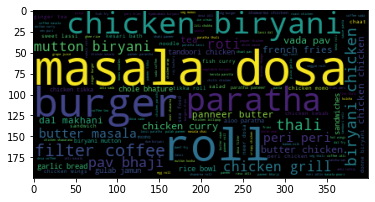

In [68]:
# Pass the above collection of large string to Word Cloud
from wordcloud import WordCloud, STOPWORDS

qb_word_cloud = WordCloud(stopwords=set(STOPWORDS)).generate(qb_dish_liked)
print("Word Cloud (Quick Bites)")
plt.imshow(qb_word_cloud)

In [69]:
# Most liked dishes for Casual Dining
filt = (df['rest_type'] == 'Casual Dining')
casual_dining_restaurants = df[filt].dropna().reset_index()
casual_dining_restaurants.drop(columns=['index'],inplace=True)
casual_dining_restaurants

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
3,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/szechuan-drag...,"8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...",Szechuan Dragon,Yes,No,4.2,1647,00 919663567711\r\n+91 9916326323,Banashankari,Casual Dining,"Noodles, Momos, Veg Manchow Soup, Kung Pao Chi...","Chinese, Thai, Momos",600.0,"[('Rated 4.0', 'RATED\n Located near BMS coll...",[],Delivery,Banashankari,Quick Bites + Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,https://www.zomato.com/bangalore/chianti-white...,"1, Ground Floor, Ascendas Park Square Mall, Wh...",Chianti,No,Yes,4.6,848,+91 8061224716\n+91 8061224717,"ITPL Main Road, Whitefield",Casual Dining,"Pizza, Pasta, Salads, Potato Mash, Bruschettas...",Italian,1500.0,"[('Rated 4.0', 'RATED\n Had visited this plac...",[],Dine-out,Whitefield,Quick Bites + Casual Dining
7345,https://www.zomato.com/bangalore/chung-wah-itp...,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,No,No,2.5,73,+91 9535948061,"ITPL Main Road, Whitefield",Casual Dining,Manchow Soup,"Chinese, Momos",800.0,"[('Rated 1.0', 'RATED\n Food is not everythin...",[],Dine-out,Whitefield,Quick Bites + Casual Dining
7346,https://www.zomato.com/bangalore/shaan-e-punja...,"4th Floor, Food Court, Ascendas Park Square, W...",Shaan-E-Punjab,Yes,No,2.9,84,080 28026525,"ITPL Main Road, Whitefield",Casual Dining,"Butter Chicken, Chicken Tikka Masala, Paneer T...",North Indian,500.0,"[('Rated 3.0', 'RATED\n Pretty average place ...","['Palak Paneer Combo', 'Chicken Tikka Combo', ...",Dine-out,Whitefield,Quick Bites + Casual Dining
7347,https://www.zomato.com/bangalore/little-onnion...,"Arya Hub Mall, ITPL Main Road, Whitefield",Little Onnion,Yes,No,3.8,134,+91 7780502068\n+91 9963081629,"ITPL Main Road, Whitefield",Casual Dining,"Vegetable Biryani, Dum Biryani, Kheer","Biryani, Andhra",500.0,"[('Rated 1.0', 'RATED\n I ordered for a birya...","['Veg Dum Biryani', 'Boneless Chicken Dum Biry...",Dine-out,Whitefield,Quick Bites + Casual Dining


In [70]:
# Get all the words from 'dish_liked' column into one string

cd_dish_liked = ''

for dish_list in casual_dining_restaurants['dish_liked'].str.split(','):
    for i in range(len(dish_list)):
        if dish_list[i][0] == ' ':
            dish_list[i] = dish_list[i][1:len(dish_list[i])]
            
        dish_list[i] = dish_list[i].lower()
        
    dish_list_str = ' '.join(dish_list)
    cd_dish_liked += dish_list_str + ' '
    
print(cd_dish_liked)

pasta lunch buffet masala papad paneer lajawab tomato shorba dum biryani sweet corn soup momos lunch buffet chocolate nirvana thai green curry paneer tikka dum biryani chicken biryani panipuri gol gappe onion rings pasta kadhai paneer salads salad roti jeera rice noodles momos veg manchow soup kung pao chicken chicken lollipop chop suey dragon chicken chicken tikka masala mutton keema dosa mutton biryani raan biryani brain fry chicken grill ghee rice butter chicken noodles thali biryani momos dragon chicken hakka noodles chowmein chop suey chilli garlic noodles garlic rice prawn biryani dragon chicken chicken boneless biryani afghani biryani mughlai biryani paneer tikka biryani gongura biryani sushi noodles wine khau suey mocktails yakisoba spring roll pasta pepper pizza paneer pizza peppy paneer nachos supreme pizza manchow soup sea food crab meat crab soup fish curry chicken cafreal butter naan butter chicken salads panneer butter masala rabri gajar ka halwa manchow soup aam panna to

Word Cloud (Casual Dining)


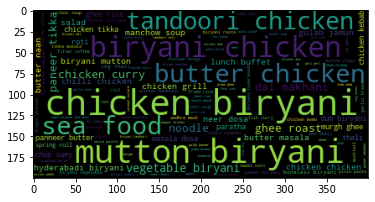

In [71]:
cd_word_cloud = WordCloud(stopwords=set(STOPWORDS)).generate(cd_dish_liked)
print("Word Cloud (Casual Dining)")
plt.imshow(cd_word_cloud)

In [72]:
## Analysing reviews of the restaurants

## We will generate word cloud of the reviews of any 5 restaurants and get the idea of the restaurant based on the words
## used to describe the restaurant.

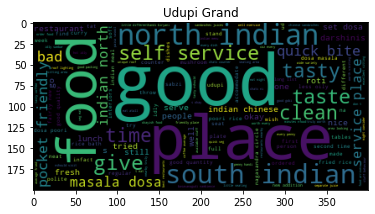

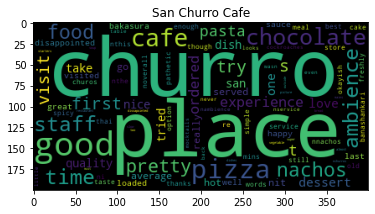

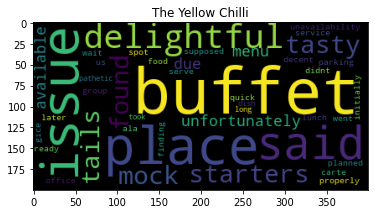

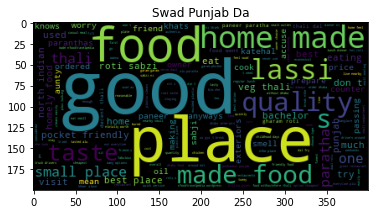

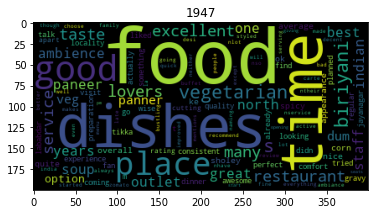

In [73]:
import re

df1 = df.dropna()
df1 = df1.reset_index()
df1.drop(columns=['index'],inplace=True)

# Randomly select any 5 restaurants
rand_rest_indices = [356,927,10051,14037,45]
df2 = df1.loc[rand_rest_indices]

# Perform analysis on the data
for index,value in df2['reviews_list'].items():
    raw_review = value
    review = re.sub('[^a-zA-Z]',' ',raw_review)
    review = review.lower()
    review = review.replace(' x ',' ')
    review = review.replace(' n ',' ')
    review = review.replace('rated',' ')
    review = re.sub(' +',' ',review)
    
    review_word_cloud = WordCloud(stopwords=set(STOPWORDS)).generate(review)
    
    plt.figure()
    plt.imshow(review_word_cloud)
    plt.title(df2.loc[index,'name'])
    

In [74]:
## Preparing data for machine learning
## Create a target (dependent) variable

In [75]:
## Split the dataframe into 2 parts
## 1. New restaurants dataframe : rating == 0 (can be used as test set)
## 2. Established restaurants dataframe : rating > 0 (can be used as training set for ML algorithm)

In [76]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [77]:
df['is_rated'] = df['rate'].apply(lambda x:1 if x>0 else 0)
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,Others,1
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield,Others,0
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,Others,0
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Others,1


In [78]:
df['is_rated'].value_counts(normalize=True)

1    0.805635
0    0.194365
Name: is_rated, dtype: float64

In [79]:
## From the above output, we can observe that approx 80% of the restaurants are rated (which will be used for training)
## and approx 20% of the restaurants are new (which will be used as test set), for which we will predict the target variable

In [80]:
rated_restaurants = df[df['is_rated'] == 1]
new_restaurants = df[df['is_rated'] == 0]

In [81]:
rated_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [82]:
new_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,Others,0
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,Others,0
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400.0,[],[],Delivery,Banashankari,Others,0


In [83]:
# We will use rated_restaurants as training data
# Use a threshold value for rating which is decided by domain expert to categorize the restaurant as good or bad
# -> good = 1
# -> bad = 0

# This will act as target variable

threshold = 3.75
rated_restaurants['target'] = rated_restaurants['rate'].apply(lambda x: 1 if x>=threshold else 0)
rated_restaurants.head()

<ipython-input-83-18ca0f8a685d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_restaurants['target'] = rated_restaurants['rate'].apply(lambda x: 1 if x>=threshold else 0)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [84]:
# Check whether data is imbalanced or balanced
rated_restaurants['target'].value_counts(normalize=True)

0    0.514125
1    0.485875
Name: target, dtype: float64

In [85]:
# From the above output, we can observe that the data is balanced with 51.4% and 48.5% distribution of target classes

In [86]:
## Perform feature extraction for the data.
## Convert data features to desired form and retain only the important features

In [87]:
rated_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [88]:
# We count total number of cuisines
rated_restaurants['total_cuisines'] = rated_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

# We count total number of types under which the restaurant falls
rated_restaurants['multiple_types'] = rated_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))

rated_restaurants

<ipython-input-88-e98925645008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_restaurants['total_cuisines'] = rated_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))
<ipython-input-88-e98925645008>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_restaurants['multiple_types'] = rated_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated,target,total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Others,1,1,3,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",...,800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,Others,1,0,2,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar",...,800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,Others,1,0,4,2
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,...,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,Others,1,0,1,1
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,...,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Others,1,1,1,1


In [89]:
rated_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'majority_type', 'is_rated',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [90]:
# Select imp features
imp_features = ['online_order', 'book_table', 'location', 'rest_type', 'approx_cost(for two people)', 
                'listed_in(type)', 'listed_in(city)', 'target', 'total_cuisines', 'multiple_types']

restaurants_train_data1 = rated_restaurants[imp_features]
restaurants_train_data1.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [91]:
## 1. Drop missing values
## 2. Differentiate categorical and numerial features

In [92]:
# Drop missing/NaN values
restaurants_train_data1.isna().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [93]:
restaurants_train_data1.shape

(41665, 10)

In [94]:
restaurants_train_data1.dropna(inplace=True)
restaurants_train_data1.shape

<ipython-input-94-23adde7fb6a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_train_data1.dropna(inplace=True)


(41271, 10)

In [95]:
restaurants_train_data1.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [96]:
restaurants_train_data1.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [97]:
# Differentiate categorical and numerical features
categorical_features = [column for column in restaurants_train_data1.columns if restaurants_train_data1[column].dtype == 'O']
numerical_features = [column for column in restaurants_train_data1.columns if restaurants_train_data1[column].dtype != 'O']

print("Categorical features")
print(categorical_features)
print("------------------------------------------------------------------------------------------------------------")
print("Numerical features")
print(numerical_features)

Categorical features
['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'listed_in(city)']
------------------------------------------------------------------------------------------------------------
Numerical features
['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']


In [98]:
# Print unique values for categorical features

for feature in categorical_features:
    print(restaurants_train_data1[feature].value_counts())
    print("----------------------------------------------------------")

Yes    27110
No     14161
Name: online_order, dtype: int64
----------------------------------------------------------
No     34967
Yes     6304
Name: book_table, dtype: int64
----------------------------------------------------------
BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64
----------------------------------------------------------
Quick Bites                   13885
Casual Dining                  9616
Cafe                           3369
Dessert Parlor                 1850
Delivery                       1671
                              ...  
Cafe, Food Court                  2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Bakery, Beve

In [99]:
## Feature encoding
## --> Convert categorical/string data to numerical form for machine learning purpose.

## One hot encoding
## --> This encoding technique creates a new column for every unique categorical/string value 
##     and assigns 1 where that value is present.

## Issues with one hot encoding
## --> If there are many unique values, then it will convert the data into very large form and occupy more resources

In [100]:
restaurants_train_data1[categorical_features].nunique()

online_order        2
book_table          2
location           92
rest_type          87
listed_in(type)     7
listed_in(city)    30
dtype: int64

In [101]:
## We can see from the above output that 'location' has 92 unique values. If we directly
## apply one hot encoding, then it will create 92 more columns/features.
## Therefore, we need to reduce the number of unique values by replacing less frequently occuring 
## items with 'others' because as such it will give columns with most of the entries as 0.

In [102]:
rest_location_contribs = restaurants_train_data1['location'].value_counts(normalize=True)*100
rest_location_contribs

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [103]:
rest_location_contribs.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Brigade Road',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari',
       'Kalyan Nagar', 'Malleshwaram', 'Richmond Road', 'Residency Road',
       'Basavanagudi', 'Frazer Town', 'Church Street', 'Brookefield',
       'New BEL Road', 'Kammanahalli', 'Lavelle Road', 'Cunningham Road',
       'Banaswadi', 'Rajajinagar', 'Domlur', 'Shanti Nagar',
       'Old Airport Road', 'St. Marks Road', 'Shivajinagar',
       'Commercial Street', 'Ejipura', 'Jeevan Bhima Nagar', 'Vasanth Nagar',
       'Koramangala 8th Block', 'Koramangala 3rd Block', 'Wilson Garden',
       'Kumaraswamy Layout', 'Nagawara', 'Bommanahalli', 'Seshadripuram',
       'Infantry Road', 'Race Course Road', 'Basaveshwara Nagar',
 

In [104]:
rest_location_contribs_df = rest_location_contribs.reset_index()
rest_location_contribs_df.columns = ['location','contribution(%)']
rest_location_contribs_df

,location,contribution(%)
0,BTM,9.398851
1,Koramangala 5th Block,5.565651
2,HSR,4.829057
3,Indiranagar,4.361416
4,JP Nagar,4.143345
...,...,...
87,Yelahanka,0.009692
88,West Bangalore,0.007269
89,Rajarajeshwari Nagar,0.004846
90,Nagarbhavi,0.002423


In [105]:
threshold = 0.4
rest_location_contribs_df['contribution(%)'] = rest_location_contribs_df['contribution(%)'].apply(lambda x: x if x>threshold else np.nan)
rest_location_contribs_df.dropna(inplace=True)
imp_locations = (rest_location_contribs_df['location']).tolist()
print(imp_locations)

['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar', 'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road', 'Koramangala 7th Block', 'Koramangala 6th Block', 'Brigade Road', 'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor', 'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari', 'Kalyan Nagar', 'Malleshwaram', 'Richmond Road', 'Residency Road', 'Basavanagudi', 'Frazer Town', 'Church Street', 'Brookefield', 'New BEL Road', 'Kammanahalli', 'Lavelle Road', 'Cunningham Road', 'Banaswadi', 'Rajajinagar', 'Domlur', 'Shanti Nagar', 'Old Airport Road', 'St. Marks Road', 'Shivajinagar', 'Commercial Street', 'Ejipura', 'Jeevan Bhima Nagar', 'Vasanth Nagar', 'Koramangala 8th Block', 'Koramangala 3rd Block', 'Wilson Garden']


In [106]:
restaurants_train_data1['location'] = restaurants_train_data1['location'].apply(lambda x: x if x in imp_locations else 'Other')

<ipython-input-106-ab3e52be848a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_train_data1['location'] = restaurants_train_data1['location'].apply(lambda x: x if x in imp_locations else 'Other')


In [107]:
restaurants_train_data1

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,2,2
51711,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,4,2
51712,No,No,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0,1,1
51715,No,Yes,Other,Bar,2500.0,Pubs and bars,Whitefield,1,1,1


In [108]:
# We will apply same method as above to reduce the number of 'rest_type'

rest_type_contribs = restaurants_train_data1['rest_type'].value_counts(normalize=True)*100
rest_type_contribs

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Cafe, Food Court               0.004846
Dessert Parlor, Food Court     0.004846
Food Court, Beverage Shop      0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [109]:
rest_type_contribs_df = rest_type_contribs.reset_index()
rest_type_contribs_df.columns = ['rest_type','contribution(%)']
rest_type_contribs_df

,rest_type,contribution(%)
0,Quick Bites,33.643478
1,Casual Dining,23.299654
2,Cafe,8.163117
3,Dessert Parlor,4.482566
4,Delivery,4.048848
...,...,...
82,"Cafe, Food Court",0.004846
83,"Dessert Parlor, Food Court",0.004846
84,"Food Court, Beverage Shop",0.004846
85,"Bakery, Beverage Shop",0.002423


In [110]:
threshold = 1.5
rest_type_contribs_df['contribution(%)'] = rest_type_contribs_df['contribution(%)'].apply(lambda x: x if x>threshold else np.nan)
rest_type_contribs_df.dropna(inplace=True)
imp_types = (rest_type_contribs_df['rest_type']).tolist()
print(imp_types)

['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery', 'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop', 'Bar']


In [111]:
restaurants_train_data1['rest_type'] = restaurants_train_data1['rest_type'].apply(lambda x: x if x in imp_types else 'Other')
restaurants_train_data1

<ipython-input-111-442de51ea9e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_train_data1['rest_type'] = restaurants_train_data1['rest_type'].apply(lambda x: x if x in imp_types else 'Other')


,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,multiple_types
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,Other,800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,2,2
51711,No,No,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0,4,2
51712,No,No,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0,1,1
51715,No,Yes,Other,Bar,2500.0,Pubs and bars,Whitefield,1,1,1


In [112]:
for feature in categorical_features:
    print(feature," --> ",restaurants_train_data1[feature].nunique()," unique values")

online_order  -->  2  unique values
book_table  -->  2  unique values
location  -->  47  unique values
rest_type  -->  11  unique values
listed_in(type)  -->  7  unique values
listed_in(city)  -->  30  unique values


In [113]:
## We have reduced the number of unique values of the categorical features and now we will perform One hot encoding

In [114]:
categorical_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [115]:
categorical_data = restaurants_train_data1[categorical_features]
categorical_data.head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,Other,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [116]:
## We will iterate through the columns of this categorical data and generate one-hot-encoded dataframe for
## each column, and then append that one-hot-encoded dataframe to this categorical data.
## After appending all the encoded dataframes, we can drop the columns containing actual categorical values.

## One-hot-encoding can be done using pd.get_dummies() 

In [117]:
for feature in categorical_features:
    encoded_df = pd.get_dummies(categorical_data[feature],prefix=feature,drop_first=True)
    categorical_data = pd.concat([categorical_data,encoded_df],axis=1)
    categorical_data.drop(columns=[feature],inplace=True)
    
categorical_data.head()

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
categorical_data.shape

(41271, 93)

In [119]:
## 1. Now we prepare final dataframe for ML
## 2. Then we apply Random Forest algorithm for classification

In [120]:
# Merge or concatenate numerical features data and encoded categorical data
final_data1 = pd.concat([restaurants_train_data1[numerical_features],categorical_data],axis=1)
final_data1.head()

,approx_cost(for two people),target,total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X = final_data1.drop(columns=['target'])
y = final_data1['target']

# Now we perform train/test split and apply Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_pred,y_test)

array([[3518,  931],
       [ 734, 3072]], dtype=int64)

In [123]:
accuracy_score(y_pred,y_test)

0.7983040581465778

In [124]:
## Apply different algorithms and check the accuracy
## 1. Random Forest Classifier
## 2. Logistic Regression
## 3. Naive Bayes
## 4. Decision Tree
## 5. K-nearest neighbours

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('k-NN', KNeighborsClassifier())
]

for name,model in models:
    
    print(name)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("\nConfusion matrix")
    print(confusion_matrix(y_pred,y_test))
    
    print("\nAccuracy")
    print(accuracy_score(y_pred,y_test))
    
    print("\n---------------------------------------------------------------\n")
    

Random Forest

Confusion matrix
[[3505  972]
 [ 747 3031]]

Accuracy
0.7917625681405209

---------------------------------------------------------------

Logistic Regression


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Confusion matrix
[[3432 1489]
 [ 820 2514]]

Accuracy
0.7202907328891581

---------------------------------------------------------------

Naive Bayes

Confusion matrix
[[3040 1460]
 [1212 2543]]

Accuracy
0.6763173834039976

---------------------------------------------------------------

Decision Tree

Confusion matrix
[[3643  812]
 [ 609 3191]]

Accuracy
0.82786190187765

---------------------------------------------------------------

k-NN

Confusion matrix
[[3623 1006]
 [ 629 2997]]

Accuracy
0.8019382192610539

---------------------------------------------------------------



In [126]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X,y)

DecisionTreeClassifier()

In [127]:
## Now we will apply Decision Tree on the new restaurants data to predict their success.
## But first we will need to convert it to desired format.

In [128]:
new_restaurants

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,Others,0
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,Others,0
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400.0,[],[],Delivery,Banashankari,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400.0,[],[],Dine-out,Whitefield,Quick Bites + Casual Dining,0
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,Others,0
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,Others,0
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield,Others,0


In [129]:
# We count total number of cuisines
new_restaurants['total_cuisines'] = new_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

# We count total number of types under which the restaurant falls
new_restaurants['multiple_types'] = new_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))

new_restaurants.head()

<ipython-input-129-c2f4c0517e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_restaurants['total_cuisines'] = new_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))
<ipython-input-129-c2f4c0517e1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_restaurants['multiple_types'] = new_restaurants['rest_type'].astype(str).apply(lambda x: len(x.split(',')))


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated,total_cuisines,multiple_types
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,...,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0,1,1
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,+91 8553206035,Banashankari,"Takeaway, Delivery",...,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,Others,0,2,2
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,...,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0,2,1
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,...,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,Others,0,2,1
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",...,South Indian,400.0,[],[],Delivery,Banashankari,Others,0,1,2


In [130]:
# Select imp features
imp_features = ['online_order', 'book_table', 'location', 'rest_type', 'approx_cost(for two people)', 
                'listed_in(type)', 'listed_in(city)', 'total_cuisines', 'multiple_types']

restaurants_for_prediction = new_restaurants[imp_features]
restaurants_for_prediction.reset_index(inplace=True)
restaurants_for_prediction.drop(columns=['index'],inplace=True)
restaurants_for_prediction.head()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_types
0,No,No,Banashankari,Quick Bites,150.0,Delivery,Banashankari,1,1
1,No,No,Banashankari,"Takeaway, Delivery",500.0,Delivery,Banashankari,2,2
2,No,No,Banashankari,Quick Bites,100.0,Delivery,Banashankari,2,1
3,No,No,Banashankari,Delivery,500.0,Delivery,Banashankari,2,1
4,No,No,Banashankari,"Takeaway, Delivery",400.0,Delivery,Banashankari,1,2


In [131]:
restaurants_for_prediction.isna().sum()

online_order                    0
book_table                      0
location                       21
rest_type                      78
approx_cost(for two people)    99
listed_in(type)                 0
listed_in(city)                 0
total_cuisines                  0
multiple_types                  0
dtype: int64

In [132]:
restaurants_for_prediction.dropna(inplace=True)
restaurants_for_prediction.shape

<ipython-input-132-3e3e660ba405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_for_prediction.dropna(inplace=True)


(9896, 9)

In [133]:
# Differentiate categorical and numerical features
categorical_features = [column for column in restaurants_for_prediction.columns if restaurants_for_prediction[column].dtype == 'O']
numerical_features = [column for column in restaurants_for_prediction.columns if restaurants_for_prediction[column].dtype != 'O']

print("Categorical features")
print(categorical_features)
print("-----------------------------------------------------------------------")
print("Numerical features")
print(numerical_features)

Categorical features
['online_order', 'book_table', 'location', 'rest_type', 'listed_in(type)', 'listed_in(city)']
-----------------------------------------------------------------------
Numerical features
['approx_cost(for two people)', 'total_cuisines', 'multiple_types']


In [134]:
rest_location_contribs = restaurants_for_prediction['location'].value_counts(normalize=True)*100
rest_location_contribs_df = rest_location_contribs.reset_index()
rest_location_contribs_df.columns = ['location','contribution(%)']
rest_location_contribs_df

,location,contribution(%)
0,BTM,12.045271
1,Whitefield,5.507276
2,JP Nagar,5.143492
3,HSR,5.082862
4,Electronic City,4.193614
...,...,...
80,North Bangalore,0.040420
81,West Bangalore,0.030315
82,Jakkur,0.030315
83,Sankey Road,0.010105


In [135]:
threshold = 0.4
rest_location_contribs_df['contribution(%)'] = rest_location_contribs_df['contribution(%)'].apply(lambda x: x if x>threshold else np.nan)
rest_location_contribs_df.dropna(inplace=True)
imp_locations = (rest_location_contribs_df['location']).tolist()
print(imp_locations)

['BTM', 'Whitefield', 'JP Nagar', 'HSR', 'Electronic City', 'Marathahalli', 'Bannerghatta Road', 'Koramangala 1st Block', 'Jayanagar', 'Bellandur', 'Indiranagar', 'Shivajinagar', 'Richmond Road', 'Sarjapur Road', 'Koramangala 5th Block', 'Ejipura', 'Banaswadi', 'Koramangala 4th Block', 'Ulsoor', 'Brigade Road', 'Banashankari', 'Frazer Town', 'Kalyan Nagar', 'Kammanahalli', 'Shanti Nagar', 'New BEL Road', 'Rajajinagar', 'Koramangala 7th Block', 'Brookefield', 'MG Road', 'Commercial Street', 'Bommanahalli', 'Basavanagudi', 'Old Airport Road', 'Malleshwaram', 'Koramangala 8th Block', 'Domlur', 'Koramangala 6th Block', 'Residency Road', 'Thippasandra', 'Wilson Garden', 'Basaveshwara Nagar', 'HBR Layout', 'Vasanth Nagar', 'City Market', 'Hennur', 'Majestic', 'Lavelle Road']


In [136]:
restaurants_for_prediction['location'] = restaurants_for_prediction['location'].apply(lambda x: x if x in imp_locations else 'Other')
restaurants_for_prediction

<ipython-input-136-b89b57eaf344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_for_prediction['location'] = restaurants_for_prediction['location'].apply(lambda x: x if x in imp_locations else 'Other')


,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_types
0,No,No,Banashankari,Quick Bites,150.0,Delivery,Banashankari,1,1
1,No,No,Banashankari,"Takeaway, Delivery",500.0,Delivery,Banashankari,2,2
2,No,No,Banashankari,Quick Bites,100.0,Delivery,Banashankari,2,1
3,No,No,Banashankari,Delivery,500.0,Delivery,Banashankari,2,1
4,No,No,Banashankari,"Takeaway, Delivery",400.0,Delivery,Banashankari,1,2
...,...,...,...,...,...,...,...,...,...
10047,No,No,Brookefield,Quick Bites,400.0,Dine-out,Whitefield,1,1
10048,No,No,Whitefield,Bar,900.0,Drinks & nightlife,Whitefield,1,1
10049,No,No,Whitefield,Bar,900.0,Pubs and bars,Whitefield,1,1
10050,No,No,Whitefield,Bar,600.0,Pubs and bars,Whitefield,1,1


In [137]:
# We will apply same method as above to reduce the number of 'rest_type'

rest_type_contribs = restaurants_for_prediction['rest_type'].value_counts(normalize=True)*100
rest_type_contribs_df = rest_type_contribs.reset_index()
rest_type_contribs_df.columns = ['rest_type','contribution(%)']
rest_type_contribs_df

,rest_type,contribution(%)
0,Quick Bites,52.172595
1,Delivery,9.256265
2,"Takeaway, Delivery",7.447454
3,Casual Dining,6.659256
4,Bakery,4.415926
5,Dessert Parlor,3.991512
6,Cafe,3.213420
7,Beverage Shop,2.273646
8,Sweet Shop,1.232821
9,Food Court,1.222716


In [138]:
threshold = 1.5
rest_type_contribs_df['contribution(%)'] = rest_type_contribs_df['contribution(%)'].apply(lambda x: x if x>threshold else np.nan)
rest_type_contribs_df.dropna(inplace=True)
imp_types = (rest_type_contribs_df['rest_type']).tolist()
print(imp_types)

['Quick Bites', 'Delivery', 'Takeaway, Delivery', 'Casual Dining', 'Bakery', 'Dessert Parlor', 'Cafe', 'Beverage Shop']


In [139]:
restaurants_for_prediction['rest_type'] = restaurants_for_prediction['rest_type'].apply(lambda x: x if x in imp_types else 'Other')
restaurants_for_prediction

<ipython-input-139-c0a43ad5917e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_for_prediction['rest_type'] = restaurants_for_prediction['rest_type'].apply(lambda x: x if x in imp_types else 'Other')


,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),total_cuisines,multiple_types
0,No,No,Banashankari,Quick Bites,150.0,Delivery,Banashankari,1,1
1,No,No,Banashankari,"Takeaway, Delivery",500.0,Delivery,Banashankari,2,2
2,No,No,Banashankari,Quick Bites,100.0,Delivery,Banashankari,2,1
3,No,No,Banashankari,Delivery,500.0,Delivery,Banashankari,2,1
4,No,No,Banashankari,"Takeaway, Delivery",400.0,Delivery,Banashankari,1,2
...,...,...,...,...,...,...,...,...,...
10047,No,No,Brookefield,Quick Bites,400.0,Dine-out,Whitefield,1,1
10048,No,No,Whitefield,Other,900.0,Drinks & nightlife,Whitefield,1,1
10049,No,No,Whitefield,Other,900.0,Pubs and bars,Whitefield,1,1
10050,No,No,Whitefield,Other,600.0,Pubs and bars,Whitefield,1,1


In [140]:
for feature in categorical_features:
    print(feature," --> ",restaurants_for_prediction[feature].nunique()," unique values")

online_order  -->  2  unique values
book_table  -->  2  unique values
location  -->  49  unique values
rest_type  -->  9  unique values
listed_in(type)  -->  7  unique values
listed_in(city)  -->  30  unique values


In [141]:
categorical_data = restaurants_for_prediction[categorical_features]
categorical_data.head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,No,No,Banashankari,Quick Bites,Delivery,Banashankari
1,No,No,Banashankari,"Takeaway, Delivery",Delivery,Banashankari
2,No,No,Banashankari,Quick Bites,Delivery,Banashankari
3,No,No,Banashankari,Delivery,Delivery,Banashankari
4,No,No,Banashankari,"Takeaway, Delivery",Delivery,Banashankari


In [142]:
for feature in categorical_features:
    encoded_df = pd.get_dummies(categorical_data[feature],prefix=feature,drop_first=True)
    categorical_data = pd.concat([categorical_data,encoded_df],axis=1)
    categorical_data.drop(columns=[feature],inplace=True)
    
categorical_data.head()

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,location_Brigade Road,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Merge or concatenate numerical features data and encoded categorical data
final_data_for_prediction = pd.concat([restaurants_for_prediction[numerical_features],categorical_data],axis=1)
final_data_for_prediction.head()

,approx_cost(for two people),total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,150.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,500.0,2,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,400.0,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
predictions = decision_tree_model.predict(final_data_for_prediction)
print(predictions)

[0 0 0 ... 0 1 1]


In [145]:
outcome_df = final_data_for_prediction
outcome_df['good/bad'] = predictions
outcome_df

,approx_cost(for two people),total_cuisines,multiple_types,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield,good/bad
0,150.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,500.0,2,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,400.0,1,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10047,400.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10048,900.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10049,900.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10050,600.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [146]:
outcome_df['good/bad'].value_counts()

0    7480
1    2416
Name: good/bad, dtype: int64

In [147]:
successful_restaurants_filt = outcome_df[outcome_df['good/bad'] == 1]
unsuccessful_restaurants_filt = outcome_df[outcome_df['good/bad'] == 0]

In [148]:
successful_restaurants_indices = successful_restaurants_filt.index
successful_restaurants_indices.tolist()

[4,
 8,
 13,
 14,
 15,
 23,
 35,
 37,
 39,
 48,
 51,
 55,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 70,
 72,
 73,
 74,
 78,
 79,
 83,
 84,
 85,
 89,
 93,
 97,
 101,
 117,
 118,
 120,
 122,
 123,
 125,
 128,
 131,
 132,
 133,
 150,
 154,
 160,
 166,
 168,
 176,
 185,
 186,
 187,
 195,
 198,
 206,
 209,
 210,
 220,
 221,
 258,
 259,
 263,
 269,
 272,
 276,
 279,
 280,
 281,
 284,
 293,
 300,
 301,
 304,
 305,
 333,
 337,
 338,
 343,
 361,
 362,
 363,
 371,
 377,
 378,
 382,
 383,
 384,
 388,
 389,
 400,
 401,
 404,
 407,
 408,
 411,
 414,
 417,
 424,
 439,
 468,
 471,
 474,
 475,
 477,
 478,
 481,
 485,
 487,
 488,
 494,
 505,
 511,
 525,
 529,
 532,
 533,
 535,
 536,
 537,
 538,
 539,
 542,
 543,
 547,
 551,
 554,
 556,
 557,
 558,
 561,
 563,
 568,
 584,
 585,
 586,
 589,
 592,
 595,
 596,
 599,
 602,
 605,
 612,
 613,
 626,
 636,
 639,
 640,
 648,
 652,
 655,
 657,
 659,
 675,
 677,
 678,
 690,
 696,
 698,
 708,
 709,
 713,
 723,
 725,
 730,
 736,
 740,
 749,
 757,
 759,
 762,
 770,
 773,
 

In [149]:
unsuccessful_restaurants_indices = unsuccessful_restaurants_filt.index
unsuccessful_restaurants_indices.tolist()

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 56,
 58,
 65,
 66,
 67,
 68,
 69,
 71,
 75,
 76,
 77,
 80,
 81,
 82,
 86,
 87,
 88,
 90,
 91,
 92,
 94,
 95,
 96,
 98,
 99,
 100,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 119,
 121,
 124,
 126,
 127,
 129,
 130,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 196,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 23

In [150]:
new_restaurants.reset_index(inplace=True)
new_restaurants.drop(columns=['index'],inplace=True)
new_restaurants.head()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),majority_type,is_rated,total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,...,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0,1,1
1,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,0.0,0,+91 8553206035,Banashankari,"Takeaway, Delivery",...,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,Others,0,2,2
2,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,...,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,Quick Bites + Casual Dining,0,2,1
3,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,...,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,Others,0,2,1
4,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",...,South Indian,400.0,[],[],Delivery,Banashankari,Others,0,1,2


In [151]:
print("Successful restaurants names")
print("-------------------------------------------------------------")
new_restaurants.loc[successful_restaurants_indices.tolist(),'name']

Successful restaurants names
-------------------------------------------------------------


4                                                  Sunsadm
8                         Dharwad Line Bazaar Mishra Pedha
13                                     Kannadigas Karavali
14                                    Soms Kitchen & Bakes
15                                 Banashankari Nati Style
                               ...                        
10024                                   Arabian Fame Grill
10026                                      Panky's Kitchen
10032                                           Shiv sagar
10050                             Vinod Bar And Restaurant
10051    Plunge - Sheraton Grand Bengaluru Whitefield H...
Name: name, Length: 2416, dtype: object

In [152]:
print("Unsuccessful restaurants names")
print("-------------------------------------------------------------")
new_restaurants.loc[unsuccessful_restaurants_indices.tolist(),'name']

Unsuccessful restaurants names
-------------------------------------------------------------


0                 Spicy Tandoor
1         Om Sri Vinayaka Chats
2                     Chill Out
3                Me And My Cake
5        Annapooraneshwari Mess
                  ...          
10045    Basaveshwara Khanavali
10046         New Ambur Biryani
10047            Punjabi Thadka
10048              Topsy Turvey
10049              Topsy Turvey
Name: name, Length: 7480, dtype: object